# Introduction

A strategy often described by traders as "picking up pennies in front of a steamroller," the carry trade involves borrowing in a low-interest-rate currency and investing in a high-interest-rate currency to capture the interest rate differential. While this strategy can yield consistent small profits, it also carries significant risk, particularly in volatile market conditions. High volatility adversely affects carry trades because these strategies rely on relative stability and predictability in exchange rates. High volatility can lead to sharp and unexpected currency movements, which can erode or negate the gains from interest rate differentials.

The effectiveness of the carry trade hinges on the failure of Uncovered Interest Parity (UIP), which can be characterized as follows:
$$E\left(\frac{S_{t+1}}{S_t}\right) = \frac{1 + i_d}{1 + i_f}$$

Where:
- $ E\left(\frac{S_{t+1}}{S_t}\right)$ is the expected future spot exchange rate relative to the current spot exchange rate
- $( i_d )$ is the domestic interest rate
- $( i_f )$ is the foreign interest rate

According to UIP, the difference in interest rates between two countries should equal the expected change in exchange rates between the countries' currencies, otherwise there will be an arbitrage opportunity. However, in practice, exchange rates do not always adjust to offset the interest rate differential. Many attribute this to an inherent currency risk that the UIP theory ignores. The failure of UIP allows traders to profit from the carry trade.

To better manage the risk of high volatility and enhance the efficacy of the carry trade, this project focuses on modeling the volatility of the G10 currency to USD spot rates. Building on the foundational benchmark work of Meese and Rogoff (1983) and incorporating Citibank’s "on-off switch" trade strategy, the goal of this project is to develop a robust GARCH based volatility forecasting risk indicator, reducing the risk of being steamrolled.

## Key Background

Meese and Rogoff (1983) found that a simple random walk model, predicting no change between the spot price at T and T+1, outpreformed all time series models for forecasting foreign exchange rate levels at 1, 6, and 12 month horizons. While Meese and Rogoff were modeling non-stationary level rates, the findings of Meese and Rogoff have been revisited and examined in the context of more recent data and methodologies. The main conclusion—that a simple random walk model often outperforms more complex structural and time series models in out-of-sample exchange rate forecasting—remains a significant reference point in exchange rate modeling.

Subsequent research has shown that while some models can improve in-sample predictability using various fundamental factors, the random walk model still poses a strong benchmark due to the inherent challenges and instabilities in exchange rate prediction. Studies suggest that structural changes and parameter instability in exchange rates contribute to the difficulty of surpassing the random walk model's performance in out-of-sample forecasts. Moreover, recent advancements have explored micro-based approaches and the inclusion of high-frequency data, showing some promise in specific contexts but still not consistently outperforming the random walk model across broader horizons and different conditions​ (Molodtsova & Papell, 2014), (Moosa & Burns, 2015).

## Portfolio Strategies and Forecasting Methodology
### Pairwise Carry Trade Portfolio
The pairwise carry strategy involves taking long positions in high-interest-rate currencies and short positions in low-interest-rate currencies. The idea is to exploit the interest rate differential between two currencies. This strategy is based on the assumption that currencies with higher interest rates will either appreciate or remain stable relative to currencies with lower interest rates. For a basket of currencies, this strategy would be finding the single lowest and single highest interest rate countries.

### HML Carry Trade Portfolio
The HML (High Minus Low) carry trade strategy involves taking long positions in several of the highest yielding currencies and short positions in several of the lowest yielding currencies. The intention of this is to reduce idiosyncratic risk associated with investing into single currencies, therefore ideally increasing Sharpe ratio. The HML portfolio has some discretion to how much risk reduction is desired at the cost of lower returns. For this project, HML weighting will be distirbuted 70% - 20% - 10% for the 1st, 2nd, and 3rd leading currencies in both the long and short baskets. The intention here is to maintain a strong speculative position in the leading currencies and hedge the risk of an idisoyncratic black swan event with 30% of the allocation in the other currencies.

### Citibank’s "On-Off Switch" Trade Strategy
The Citibank "on and off switch" strategy for the carry trade involves dynamically adjusting exposure to carry trades based on market conditions, particularly focusing on periods of low and high volatility. The strategy involves turning "on" carry trade positions during periods of low volatility and turning them "off" during periods of high volatility. The decision to switch on or off is based on indicators that predict market volatility and risk. For this project, the strategy will be extended to function around the GARCH volatility indicator.

### GARCH Models
The Generalized Autoregressive Conditional Heteroskedasticity (GARCH) family of models are used to estimate and forecast volatility of a time series. The GARCH model assumes that the variance of the error terms (i.e., the volatility) changes over time and is dependent on past errors and past variances, typically denoted as GARCH($p$,$q$), where $p$ represents the number of lagged variances and $q$ represents the number of lagged squared residuals used in the model.

The variance equation for the GARCH(p, q) model is given by:


$$\sigma_t^2 = \alpha_0 + \sum_{i=1}^{q} \alpha_i \epsilon_{t-i}^2 + \sum_{j=1}^{p} \beta_j \sigma_{t-j}^2$$

where:
- $(\sigma_t^2)$ is the conditional variance at time $(t)$
- $(\epsilon_t)$ are the residuals
- $(\alpha_0)$ is a constant
- $(\alpha_i)$ are the coefficients for the lagged squared residuals
- $(\beta_j)$ are the coefficients for the lagged variances

The mean equation often specified with the GARCH model is:

$$y_t = \mu + \sum_{k=1}^{m} \phi_k y_{t-k} + \sum_{l=1}^{n} \theta_l \epsilon_{t-l} + \epsilon_t$$

where:
- $(y_t)$ is the time series data
- $(\mu)$ is the mean
- $(\phi_k)$ are the coefficients of the autoregressive terms
- $(\theta_l)$ are the coefficients of the moving average terms
- $(\epsilon_t)$ is the error term

The unique factor of GARCH is the nature of the ARCH component, which allow past variances to influence current variance estimates, coinciding with Meese and Rogoff's observed correlation in foregin exchange rates. 


# Notebook Structure

1. **Establishing Portfolio Returns and Importing Dataset**
   - 1.1 Dataset Construction (Excel)
   - 1.2 Importing the Dataset to Python

2. **GARCH Model Estimation and Testing (EViews)**
   - 2.1 Stationarity tests on explanatory variables and portfolio returns
   - 2.2 Benchmarks for GARCH model
   - 2.3 Establishing strongest GARCH for Pairwise and HML Returns
   - 2.4 Testing against benchmark

3. **Constructing Volatility Indicator**
   - 3.1 Backtesting conditional volatility - finding highest Sharpe ratio
   - 3.2 Integration with pairwise and HML carry trade portfolios
   - 3.3 Returns under indictor analysis

4. **BLPAPI Integration**
   - 4.1 Integration with Bloomberg's BLPAPI for real-time data access (done in seperate file as not all have access)


# 1.1 Dataset Construction

## Data
The data used for this project is G10 dollarized spot rates and 1-month forward premiums. The data frequency is monthly intending to match the forward contract period and the 1-month risk free returns of each currency. Data is procured from the Bloomberg Terminal.

## Carry Trade Returns
Carry trade returns are proxied by the forward returns, i.e. the log return of the spot rate at 1 period ahead less the log return of the forward rate at each month in time:

$$ LN(S_{t+1}) - LN(F_t) $$

The idea is that the forward contract is priced with the addition of the local interest rate (the forward premium). By analyzing how much the future spot rate is different from the forward rate that expires at the same time as this future spot rate, we can get the actual net interest premium each period.

## Portfolio Construction
As a first step, all currency forward premia are calulated. The forward premium functions as a proxy for interest rates in each country, therefore the carry construction will be borrowing in the lowest forward rate and investing into the highest forward rate. The forward rate is calculated as $LN(\frac{F_t}{S_t})$ at each month.

Next, the currencies are ranked by their forward premia, 1 being the lowest and 10 being the highest. Following this, portfolio weights are assigned to the rankings and the cross product of the carry trade returns and these weighting is calculated to simulate portfolio carry trade returns. 

The weightings for the pairwise portfolio are: (-1 for the lowest premium, +1 for the highest premium)
The weightings for the HML portfolio are: (-0.7, -0,2, -0.1 for the 1st, 2nd and 3rd lowest premia respectively, and 0.7, 0.2, 0.1 for the 1st, 2nd, and 3rd highest premia respectively)

## Import into Python 

The resulting portfolio returns are imported into Python from a new sheet called "ImportData" for analysis.

For details on construction please see FX_data.xlsx dataset

          Date  Pairwise Returns  HML Returns
0   1998-12-31          0.048757     0.019444
1   1999-01-29         -0.023709    -0.013124
2   1999-02-26          0.028782     0.026814
3   1999-03-31          0.006614     0.016433
4   1999-04-30          0.011302     0.008458
..         ...               ...          ...
230 2018-02-28          0.015234     0.007220
231 2018-03-30          0.012130     0.011717
232 2018-04-30         -0.008371     0.001779
233 2018-05-31         -0.020696    -0.018102
234 2018-06-28          0.000000     0.000000

[235 rows x 3 columns]


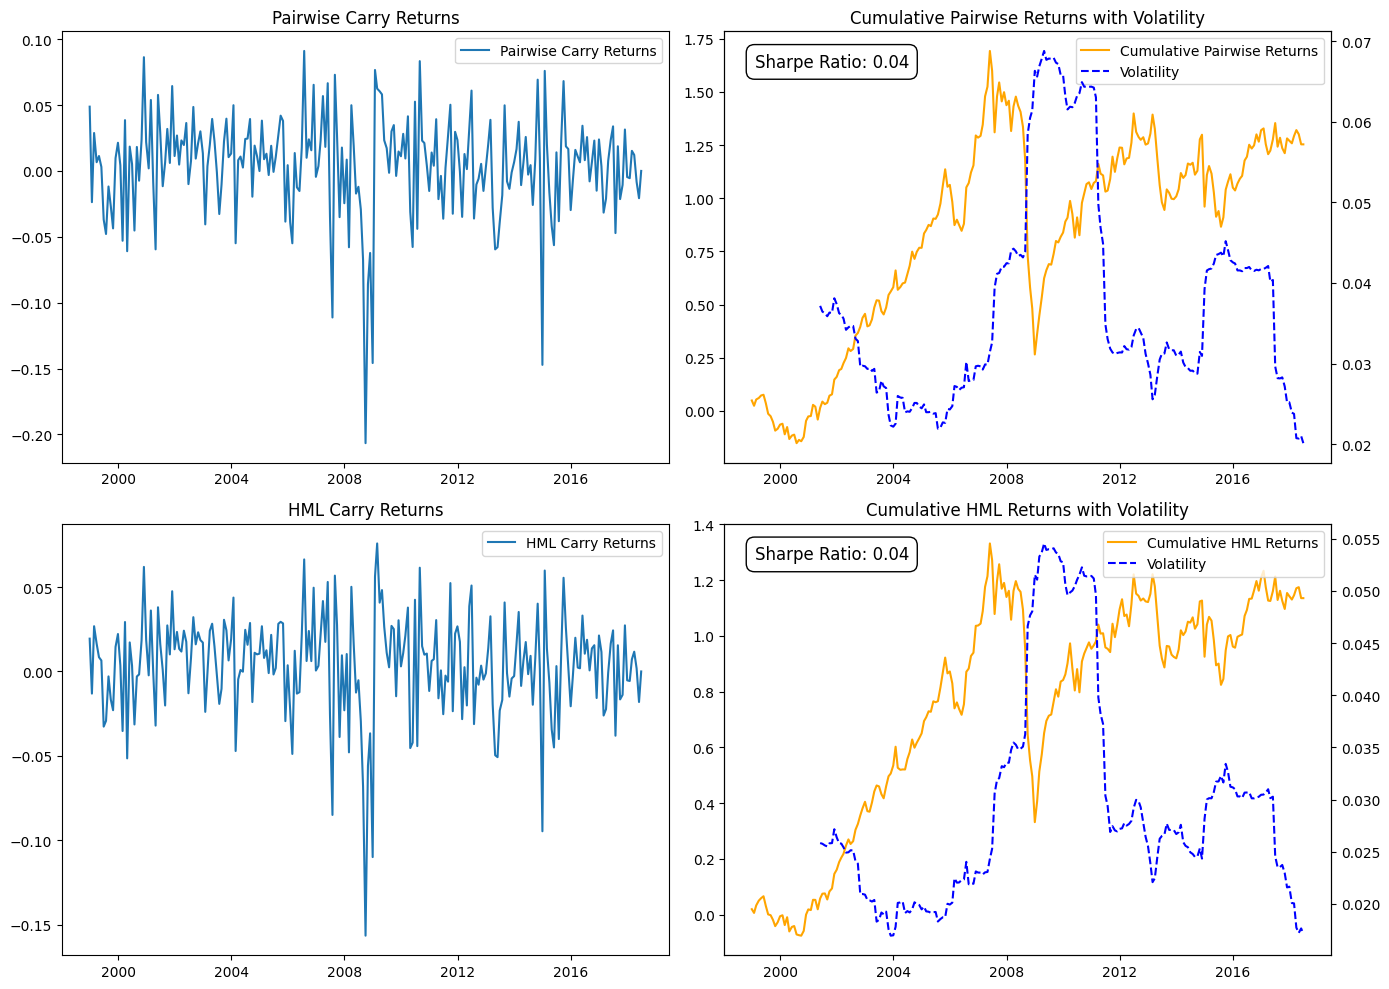

In [762]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the Excel file and read the 'ImportData' sheet
file_path = 'FX_data.xlsx'
df = pd.read_excel(file_path, sheet_name='ImportData')

# Display the contents of the DataFrame
print(df)

# Extract the necessary columns
dates = pd.to_datetime(df['Date'])
pairwise_carry_returns = df['Pairwise Returns']
hml_carry_returns = df['HML Returns']

# Calculate cumulative returns
cumulative_pairwise_returns = (1 + pairwise_carry_returns).cumprod() - 1
cumulative_hml_returns = (1 + hml_carry_returns).cumprod() - 1

# Calculate rolling volatility (standard deviation) with a window of 30 periods
rolling_window = 30
pairwise_volatility = pairwise_carry_returns.rolling(window=rolling_window).std()
hml_volatility = hml_carry_returns.rolling(window=rolling_window).std()

# Calculate Sharpe ratio
risk_free_rate = 0.0025  # Assuming risk-free rate is - a rough historical average of the US T-bill (monthly)
pairwise_sharpe_ratio = (pairwise_carry_returns.mean() - risk_free_rate) / pairwise_carry_returns.std()
hml_sharpe_ratio = (hml_carry_returns.mean() - risk_free_rate) / hml_carry_returns.std()

# Plot the data
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(14, 10))

# Plot Pairwise Carry Returns
axes[0, 0].plot(dates, pairwise_carry_returns, label='Pairwise Carry Returns')
axes[0, 0].set_title('Pairwise Carry Returns')
axes[0, 0].legend()

# Plot Cumulative Pairwise Returns with volatility
ax1 = axes[0, 1]
line1, = ax1.plot(dates, cumulative_pairwise_returns, label='Cumulative Pairwise Returns', color='orange')
ax1.set_title('Cumulative Pairwise Returns with Volatility')
ax2 = ax1.twinx()
line2, = ax2.plot(dates, pairwise_volatility, label='Volatility', color='blue', linestyle='dashed')

# Combine legends
lines = [line1, line2]
ax1.legend(lines, [line.get_label() for line in lines], loc='upper right')

ax1.annotate(f'Sharpe Ratio: {pairwise_sharpe_ratio:.2f}', xy=(0.05, 0.95), xycoords='axes fraction', 
             fontsize=12, ha='left', va='top', bbox=dict(boxstyle='round,pad=0.5', edgecolor='black', facecolor='white'))

# Plot HML Carry Returns
axes[1, 0].plot(dates, hml_carry_returns, label='HML Carry Returns')
axes[1, 0].set_title('HML Carry Returns')
axes[1, 0].legend()

# Plot Cumulative HML Returns with volatility
ax3 = axes[1, 1]
line3, = ax3.plot(dates, cumulative_hml_returns, label='Cumulative HML Returns', color='orange')
ax3.set_title('Cumulative HML Returns with Volatility')
ax4 = ax3.twinx()
line4, = ax4.plot(dates, hml_volatility, label='Volatility', color='blue', linestyle='dashed')

# Combine legends
lines = [line3, line4]
ax3.legend(lines, [line.get_label() for line in lines], loc='upper right')

ax3.annotate(f'Sharpe Ratio: {hml_sharpe_ratio:.2f}', xy=(0.05, 0.95), xycoords='axes fraction', 
             fontsize=12, ha='left', va='top', bbox=dict(boxstyle='round,pad=0.5', edgecolor='black', facecolor='white'))

plt.tight_layout()
plt.show()

From portfolio construction it is clear that volatility spikes cause sharp negative returns in the carry trade. The goal of the GARCH indicator will be to not trade during these times, and ideally increase returns and Sharpe ratio.

As for pairwise vs HML, there is no clear benefit in idiosyncratic risk reduction reflected in the Sharpe ratio for this dataset. However, it is still possible that the HML portfolio might have enhanced risk features under a GARCH indicator, so testing will still be done.

# 2.1 Testing Portfolios and Variables
Before estimating GARCH models, it is important we ensure return data and potential explanatory variables are safe to work with via several econometric tests. All preliminary testing is done in EViews and summarized below. 

## Testing Summary

### ADF Fisher Unit Root Test on All Spot Rates

| Method                  | Statistic | Prob.  |
|-------------------------|-----------|--------|
| ADF - Fisher Chi-square | 1154.33   | 0.0000 |
| ADF - Choi Z-stat       | -32.9934  | 0.0000 |
| Series | Prob.  | Lag | Max Lag | Obs |
|--------|--------|-----|---------|-----|
| AUD_D  | 0.0000 | 0   | 14      | 233 |
| CAD_D  | 0.0000 | 0   | 14      | 233 |
| CHF_D  | 0.0000 | 0   | 14      | 233 |
| DKK_D  | 0.0000 | 0   | 14      | 233 |
| EUR_D  | 0.0000 | 0   | 14      | 233 |
| GBP_D  | 0.0000 | 0   | 14      | 233 |
| JPY_D  | 0.0000 | 0   | 14      | 233 |
| NOK_D  | 0.0000 | 0   | 14      | 233 |
| NZD_D  | 0.0000 | 0   | 14      | 233 |
| SEK_D  | 0.0000 | 0   | 14      | 233 |

### ADF Fisher Unit Root Test on Pairwise and HML Returns

| Method                  | Statistic    | Prob.   |
|-------------------------|--------------|---------|
| ADF - Fisher Chi-square | 209.259      | 0.0000  |
| ADF - Choi Z-stat       | -14.0131     | 0.0000  |


| Series           | Prob.  | Lag | Max Lag | Obs |
|------------------|--------|-----|---------|-----|
| PAIRWISE_RETURNS | 0.0000 | 0   | 14      | 234 |
| HML_RETURNS      | 0.0000 | 0   | 14      | 234 |

#### Structural Breaks (Quandt-Andrews Unknown Breakpoint Test)

Null Hypothesis: No breakpoints within 15% trimmed data


| Statistic (Pairwise Portfolio)    | Value     | Prob.  |          
|-----------------------------------|-----------|--------|
| Maximum LR F-statistic (2007M06)  | 4.493342  | 0.3059 |
| Maximum Wald F-statistic (2007M06)| 4.493342  | 0.3059 |
| Exp LR F-statistic                | 0.629999  | 0.3518 |
| Exp Wald F-statistic              | 0.629999  | 0.3518 |
| Ave LR F-statistic                | 0.982422  | 0.3493 |
| Ave Wald F-statistic              | 0.982422  | 0.3493 |

| Statistic (HML Portfolio)         | Value     | Prob.  |
|-----------------------------------|-----------|--------|
| Maximum LR F-statistic (2007M06)  | 4.881014  | 0.2601 |
| Maximum Wald F-statistic (2007M06)| 4.881014  | 0.2601 |
| Exp LR F-statistic                | 0.746306  | 0.2905 |
| Exp Wald F-statistic              | 0.746306  | 0.2905 |
| Ave LR F-statistic                | 1.180663  | 0.2749 |
| Ave Wald F-statistic              | 1.180663  | 0.2749 |

**Note:** Probabilities are calculated using Hansen's (1997) method.

### Tests on Volatility Behavior of Returns, Done on a GARCH (1,1)
#### ARCH-LM Test (Testing for Volatility Clustering i.e. ARCH Effect)

Null Hypothesis: No ARCH effect, Heteroskedasticity Test: ARCH

**Pairwise Returns:**
| Statistic          | Value       | Prob.            |p-value |
|--------------------|-------------|------------------|--------|
| F-statistic        | 0.338743    | Prob. F(12,210)  | 0.9811 |
| Obs*R-squared      | 4.234586    | Prob. Chi-Sq(12) | 0.9788 |

**HML Returns:**
| Statistic        | Value     | Prob.                 |
|------------------|-----------|-----------------------|
| F-statistic      | 0.361978  | Prob. F(12,210)       | 0.9751 |
| Obs*R-squared    | 4.519155  | Prob. Chi-Square(12)  | 0.9721 |

#### Engle-Ng Sign-Bias Test (For Asymmetry i.e. Leverage Effect)
Null Hypothesis: No leverage effects in standardized residuals

**Pairwise Returns:**
| Test          | t-Statistic | Prob.  |
|---------------|-------------|--------|
| Sign-Bias     | -1.981703   | 0.0487 |
| Negative-Bias | -1.368231   | 0.1726 |
| Positive-Bias | -2.346047   | 0.0198 |
| Joint-Bias    | 7.379641    | 0.0635 |

**HML Returns:**
| Test          | t-Statistic | Prob.  |
|---------------|-------------|--------|
| Sign-Bias     | -1.737238   | 0.0837 |
| Negative-Bias | -1.528142   | 0.1279 |
| Positive-Bias | -2.097327   | 0.0371 |
| Joint-Bias    | 6.816737    | 0.0809 |

## Takeaways:
- No unit roots in any of the returns or spot rates
- No breakpoints found
- High p-value for ARCH test implies that there is an ARCH effect and GARCH might be a good specification
- Sign-Bias test close to 5%, as the leverage effect is a specific type of asymmetry, TARCH will still be tested


# 2.2 GARCH Modeling & Candidate Selection (Diebold-Mariano Test)

## Proxy for Conditional Variance (Volatility)
To proxy volatility (conditional variance), I will be using the squared residuals of an AR(1) equation for each time series, using no explanatory variables. The squared residuals capture the unexpected changes or shocks in the data that aren't explained by the model, which effectively captures the time-varying nature of volatility. An AR(1) is used for it's function of filtering out any potential autocorrelation and generating a robust volatility benchmark for each time series with no exogenous impact. This procedure be done to the return time series as well as the spot rates, which will be tested as exogenous variables in the future.

## Variable Testing
Finding ideal combinations of spot rates to enter the models endogenously or exogenously will be done via stepwise elimination, where each least significant vairable will be eliminated 1-by-1 until only those below the 5% significance level remain. In further models, if a variable conflicts with a volatility effect (asymmetry, long memory, etc...), then the variable will be dropped in preference of the volatility effect. Variables will be initally tested on a GARCH(1,1). The resulting models and their statistics are below:

## GARCH Components
To capture the effect of GARCH components, the GARCH-M, TARCH, EGARCH, FIGARCH, and FIEGARCH will also be evaluated against each other. The strongest of these models will be determined in the Diebold-Mariano test.

## Diebold-Mariano Test
The null hypothesis of the Deibold-Mariano test is that any two models listed have an equal predictive accuracy determined by the difference in their loss functions. If more than two models are listed, the loss functions are simply plotted. For this project, all GARCH family candidates will be comapred, and the winner of these will be compared with the random walk model.

The sample periods used for the test are:
**Training Sample**: December 1998 (1998M12) to December 2016 (2016M12) - 217 observations
**Evaluation sample**: January 2017 (2017M01) to June 2018 (2018M06) - 18 observations

### Results:
#### Pairwise Returns Winner: TARCH
The Tarch model proved to have the lowest loss functions out of all the candidates, suggesting G10 currency volatility behaves asymetrically.

| Evaluation Statistics | Value       |
|-----------------------|-------------|
| Sample                | 2017M01 2018M06 |
| Included observations | 18          |
| Evaluation sample     | 2017M01 2018M06 |
| Training sample       | 1999M01 2016M12 |
| Number of forecasts   | 12          |

Evaluation Statistics (Loss Functions)

| Forecast           | RMSE       | MAE        | MAPE       | SMAPE     | Theil U1 | Theil U2 |
|--------------------|------------|------------|------------|-----------|----------|----------|
| PAIRWISE_VARIABLES | 0.000739   | 0.000463   | 763.3262   | 113.5653  | 0.656719 | 0.928031 |
| PAIRWISE_TARCH     | 0.000717   | 0.000426   | 2227.738   | 95.46895  | 0.575450 | 0.713057 |
| PAIRWISE_EGARCH    | 0.000871   | 0.000513   | 100.0000   | 200.0000  | 1.000000 | 1.009757 |
| PAIRWISE_GARCHM    | 4.26E+12   | 1.11E+12   | 8.99E+19   | 192.8234  | 1.000000 | 2.83E+14 |
| PAIRWISE_FIGARCH   | 0.000871   | 0.000871   | 1.80E+19   | 189.4624  | 1.000000 | 5.66E+13 |
| Simple mean        | 8.52E+11   | 2.23E+11   | 630.4316   | 113.8653  | 0.727705 | 0.928003 |
| Simple median      | 0.000771   | 0.000457   | 774.7412   | 107.9564  | 0.763575 | 0.911070 |
| Least-squares      | NA         | NA         | NA         | NA        | NA       | NA       |
| Mean square error  | 0.000871   | 0.000441   | 5.99E+18   | 194.9474  | 0.983852 | 0.888472 |
| MSE ranks          | 2.84E+11   | 7.43E+10   | 186.2889   | 189.4624  | 0.954984 | 5.22E+13 |
| Smooth AIC weights | 0.021567   | 0.017808   | 186.2519   | 186.2889  | 0.954858 | 0.900741 |
| SIC weights        | 7.82E+11   | 2.04E+11   | 1.65E+19   | 189.7257  | 1.000000 | 5.19E+13 |

#### HML Returns Models: TARCH with NOK
For the HML portfolio, the candidate models were quite close between a GARCH(1,1) with the Norwegian Krona as an explanatory variable in the mean equation, and the TARCH model. The best course of action in this case is to merge the two models to have as much explanatory power as possible, leading to a TARCH with NOK as an explanatory variable.

| Evaluation Statistics | Value       |
|-----------------------|-------------|
| Sample                | 2017M01 2018M06 |
| Included observations | 18          |
| Evaluation sample     | 2017M01 2018M06 |
| Training sample       | 1999M01 2016M12 |
| Number of forecasts   | 12          |

Evaluation Statistics (Loss Functions)

| Forecast           | RMSE       | MAE        | MAPE       | SMAPE     | Theil U1 | Theil U2 |
|--------------------|------------|------------|------------|-----------|----------|----------|
| HML_VARIABLES      | 0.000461   | 0.000312   | 5212.841   | 104.5840  | 0.524877 | 0.357470 |
| HML_TARCH_NOK      | 0.000460   | 0.000312   | 5338.229   | 104.3334  | 0.521201 | 0.385027 |
| HML_TARCH          | 0.000482   | 0.000307   | 6136.276   | 102.4253  | 0.559712 | 0.489744 |
| HML_EGARCH         | 0.000484   | 0.000306   | 5982.341   | 102.6696  | 0.565624 | 0.454294 |
| HML_FIGARCH        | 0.000487   | 0.000348   | 9998.424   | 101.1513  | 0.466250 | 1.400237 |
| Simple mean        | 0.000460   | 0.000312   | 6532.219   | 102.0232  | 0.519971 | 0.617302 |
| Simple median      | 0.000459   | 0.000312   | 6018.347   | 103.4250  | 0.517455 | 0.454309 |
| Least-squares      | NA         | NA         | NA         | NA        | NA       | NA       |
| Mean square error  | 0.000467   | 0.000312   | 6546.215   | 101.9955  | 0.519297 | 0.617300 |
| MSE ranks          | 0.000464   | 0.000312   | 7013.595   | 101.0726  | 0.502300 | 0.732049 |
| Smooth AIC weights | 0.000461   | 0.000312   | 9379.571   | 100.9555  | 0.472132 | 1.259778 |
| SIC weights        | 0.000475   | 0.000347   | 9378.458   | 100.9551  | 0.472138 | 1.259033 |

# 2.4 Meese-Rogoff Comparison
As a next step, the winners out of the GARCH family pools are compared to the Meese and Rogoff random walk model. This model is created by regressing the portfolio residuals on their lagged values, essentially replicating the characteristic of no change from residual at time t to t+1.

The results are as follows

## Pairwise Portfolio

| Evaluation Statistics | Value       |
|-----------------------|-------------|
| Sample                | 2017M01 2018M06 |
| Included observations | 18          |
| Evaluation sample     | 2017M01 2018M06 |
| Training sample       | 1999M01 2016M12 |
| Number of forecasts   | 9           |

Combination Tests
*Null Hypothesis: Forecast i includes all information contained in others*

| Equation         | F-stat  | F-prob |
|------------------|---------|--------|
| PAIRWISE_TARCH   | 0.169582| 0.6859 |
| PAIRWISE_RW      | 0.354122| 0.5601 |

Diebold-Mariano Test (HLN Adjusted)
*Null Hypothesis: Both forecasts have the same accuracy*

| Accuracy  | Statistic | <> prob | > prob | < prob |
|-----------|-----------|---------|--------|--------|
| Abs Error | -1.280744 | 0.2175  | 0.1087 | 0.8913 |
| Sq Error  | -1.885134 | 0.0766  | 0.0383 | 0.9617 |

Evaluation Statistics

| Forecast            | RMSE      | MAE       | MAPE      | SMAPE     | Theil U1 | Theil U2 |
|---------------------|-----------|-----------|-----------|-----------|----------|----------|
| PAIRWISE_TARCH      | 0.000717  | 0.000426  | 2227.738  | 95.46895  | 0.575450 | 0.713057 |
| PAIRWISE_RW         | 0.000861  | 0.000516  | 162.0177  | 195.7223  | 0.959365 | 0.975920 |
| Simple mean         | 0.000775  | 0.000427  | 1150.552  | 100.1088  | 0.727781 | 0.844456 |
| Simple median       | 0.000775  | 0.000427  | 1150.552  | 100.1088  | 0.727781 | 0.844456 |
| Least-squares       | NA        | NA        | NA        | NA        | NA       | NA       |
| Mean square error   | 0.000772  | 0.000427  | 1184.278  | 100.1407  | 0.721696 | 0.840275 |
| MSE ranks           | 0.000767  | 0.000426  | 1059.433  | 99.46558  | 0.667705 | 0.800159 |
| Smooth AIC weights  | 0.000751  | 0.000424  | 1150.108  | 99.93653  | 0.735431 | 0.849626 |
| SIC weights         | 0.000777  | 0.000428  | 1113.046  | 100.3152  | 0.734710 | 0.849143 |


## HML Portfolio

| Evaluation Statistics | Value       |
|-----------------------|-------------|
| Sample                | 2017M01 2018M06 |
| Included observations | 18          |
| Evaluation sample     | 2017M01 2018M06 |
| Training sample       | 1999M01 2016M12 |
| Number of forecasts   | 9           |

Combination Tests
*Null Hypothesis: Forecast i includes all information contained in others*

| Equation         | F-stat  | F-prob |
|------------------|---------|--------|
| HML_TARCH_NOK    | 0.239723| 0.6311 |
| HML_RW           | 2.164685| 0.1606 |

Diebold-Mariano Test (HLN Adjusted)
*Null Hypothesis: Both forecasts have the same accuracy*

| Accuracy  | Statistic | <> prob | > prob | < prob |
|-----------|-----------|---------|--------|--------|
| Abs Error | -0.808641 | 0.4299  | 0.2149 | 0.7851 |
| Sq Error  | -1.527121 | 0.1451  | 0.0726 | 0.9274 |

Evaluation Statistics

| Forecast            | RMSE      | MAE       | MAPE      | SMAPE     | Theil U1 | Theil U2 |
|---------------------|-----------|-----------|-----------|-----------|----------|----------|
| HML_TARCH_NOK       | 0.000460  | 0.000312  | 5338.229  | 104.3334  | 0.521201 | 0.385027 |
| HML_RW              | 0.000591  | 0.000359  | 125.3063  | 190.3499  | 0.946332 | 0.999631 |
| Simple mean         | 0.000511  | 0.000317  | 2697.039  | 118.3708  | 0.686682 | 0.337384 |
| Simple median       | 0.000511  | 0.000315  | 2697.039  | 118.3708  | 0.686682 | 0.337384 |
| Least-squares       | NA        | NA        | NA        | NA        | NA       | NA       |
| Mean square error   | 0.000507  | 0.000313  | 2850.403  | 116.7113  | 0.674183 | 0.369367 |
| MSE ranks           | 0.000504  | 0.000312  | 3573.688  | 109.9935  | 0.620395 | 0.151971 |
| Smooth AIC weights  | 0.000503  | 0.000311  | 2572.145  | 109.0534  | 0.698853 | 0.374216 |
| SIC weights         | 0.000514  | 0.000316  | 2571.491  | 119.7374  | 0.697207 | 0.367712 |


The results show that the models indeed beat the random walk. We can now advance to creating an indicator based off these models for each portfolio.

# 3.1 Indicator Implementation


In [779]:
from arch import arch_model

# Rescale the returns by multiplying by 100
pairwise_carry_returns_scaled = pairwise_carry_returns * 100
hml_carry_returns_scaled = hml_carry_returns * 100

# Initialize forecasted volatility columns
df['pairwise_forecasted_volatility'] = 0.0
df['hml_forecasted_volatility'] = 0.0

# Define a smaller rolling window (e.g., 10 periods)
rolling_window = 5

# Fit the TARCH model on a rolling basis
df['pairwise_forecasted_volatility'] = 0
df['hml_forecasted_volatility'] = 0

for i in range(rolling_window, len(df)):
    # Fit TARCH model for Pairwise Returns with a rolling window
    rolling_data_pairwise = pairwise_carry_returns[i-rolling_window:i]
    tarch_model_pairwise = arch_model(rolling_data_pairwise, vol='Garch', p=1, o=1, q=1)
    tarch_fit_pairwise = tarch_model_pairwise.fit(disp='off')
    df.loc[i, 'pairwise_forecasted_volatility'] = tarch_fit_pairwise.forecast(horizon=1).variance.values[-1, :]

    # Fit TARCH model for HML Returns with a rolling window
    rolling_data_hml = hml_carry_returns[i-rolling_window:i]
    tarch_model_hml = arch_model(rolling_data_hml, vol='Garch', p=1, o=1, q=1)
    tarch_fit_hml = tarch_model_hml.fit(disp='off')
    df.loc[i, 'hml_forecasted_volatility'] = tarch_fit_hml.forecast(horizon=1).variance.values[-1, :]

# Now calculate the volatility growth and apply the threshold strategy as before
df['pairwise_volatility_growth'] = df['pairwise_forecasted_volatility'].pct_change()
df['hml_volatility_growth'] = df['hml_forecasted_volatility'].pct_change()

/Users/markbogorad/Library/Python/3.9/lib/python/site-packages/arch/univariate/base.py:311: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0005819. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
/var/folders/r6/6h8mtjj914j_0j9_yn_4cm1m0000gn/T/ipykernel_2594/973796944.py:23: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '0.0001455644929941152' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.loc[i, 'pairwise_forecasted_volatility'] = tarch_fit_pairwise.forecast(horizon=1).variance.values[-1, :]
/Users/markbogorad/Library/Python/3.9/lib/python/site-packages/arch/univariate/base.py:3

In [781]:
# Set a threshold for volatility growth (e.g., based on historical mean + standard deviation)
pairwise_growth_threshold = df['pairwise_volatility_growth'].mean() + df['pairwise_volatility_growth'].std()
hml_growth_threshold = df['hml_volatility_growth'].mean() + df['hml_volatility_growth'].std()

# Create an indicator: 1 if volatility growth is below the threshold (trade on), 0 if above (trade off)
df['pairwise_trade_active'] = df['pairwise_volatility_growth'] <= pairwise_growth_threshold
df['hml_trade_active'] = df['hml_volatility_growth'] <= hml_growth_threshold



/Users/markbogorad/Library/Python/3.9/lib/python/site-packages/pandas/core/nanops.py:1016: RuntimeWarning: invalid value encountered in subtract
  sqr = _ensure_numeric((avg - values) ** 2)


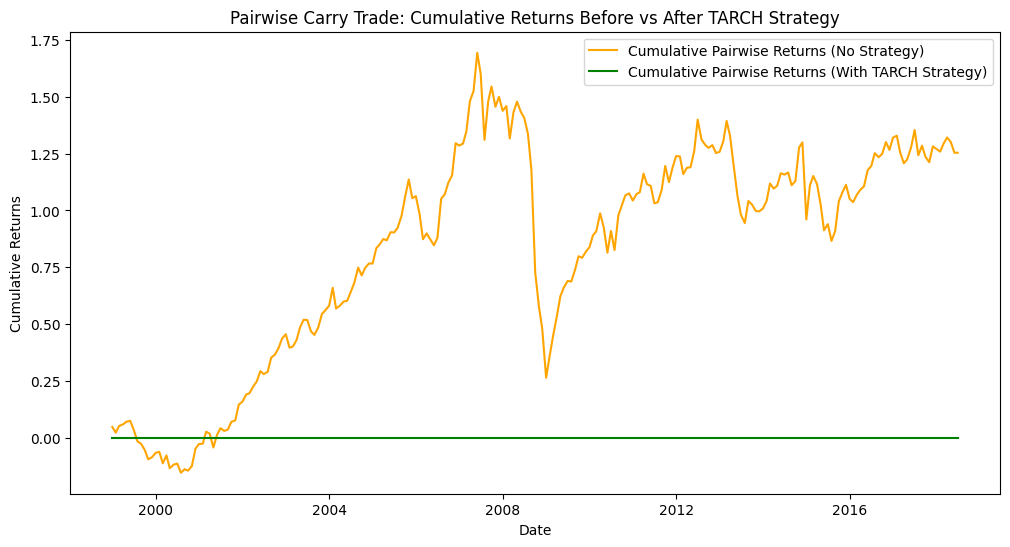

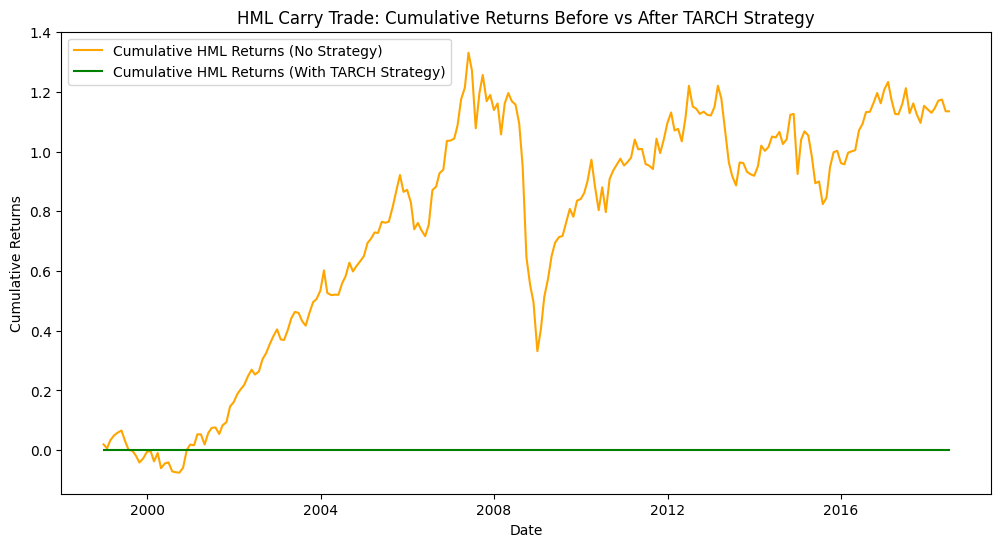

In [782]:
import pandas as pd
import matplotlib.pyplot as plt
from arch import arch_model

# Calculate strategy returns based on the on-off switch
df['pairwise_strategy_returns'] = pairwise_carry_returns * df['pairwise_trade_active']
df['hml_strategy_returns'] = hml_carry_returns * df['hml_trade_active']

# Calculate cumulative returns with the strategy
cumulative_pairwise_returns_strategy = (1 + df['pairwise_strategy_returns']).cumprod() - 1
cumulative_hml_returns_strategy = (1 + df['hml_strategy_returns']).cumprod() - 1

# Plot cumulative returns with and without the strategy

# Pairwise Carry Trade
plt.figure(figsize=(12, 6))
plt.plot(dates, cumulative_pairwise_returns, label='Cumulative Pairwise Returns (No Strategy)', color='orange')
plt.plot(dates, cumulative_pairwise_returns_strategy, label='Cumulative Pairwise Returns (With TARCH Strategy)', color='green')
plt.title('Pairwise Carry Trade: Cumulative Returns Before vs After TARCH Strategy')
plt.xlabel('Date')
plt.ylabel('Cumulative Returns')
plt.legend()
plt.show()

# HML Carry Trade
plt.figure(figsize=(12, 6))
plt.plot(dates, cumulative_hml_returns, label='Cumulative HML Returns (No Strategy)', color='orange')
plt.plot(dates, cumulative_hml_returns_strategy, label='Cumulative HML Returns (With TARCH Strategy)', color='green')
plt.title('HML Carry Trade: Cumulative Returns Before vs After TARCH Strategy')
plt.xlabel('Date')
plt.ylabel('Cumulative Returns')
plt.legend()
plt.show()



# Citations

Meese, R. A., & Rogoff, K. (1983). "Empirical exchange rate models of the seventies: Do they fit out of sample?" Journal of International Economics, 14(1-2), 3-24. https://doi.org/10.1016/0022-1996(83)90017-X

Molodtsova, T., & Papell, D. H. (2014). "Taylor rule exchange rate forecasting during the financial crisis." *Journal of Economics and Finance, 38*(4), 676-690. https://doi.org/10.1007/s12197-014-9302-6

Moosa, I. A., & Burns, K. (2015). "The Meese-Rogoff Puzzle." In Demystifying the Meese-Rogoff Puzzle. Palgrave Pivot, London. 